# EXAMEN RECUPERACIÓN DEL MÓDULO MINERÍA DE DATOS II. 
# RECUPERACIÓN AÑO 2024

# Autor: Max Cotera

# Consideraciones del Examen:

Cada ejercicio tendrá una puntuación de 2 puntos. La nota final será la suma de los puntos obtenidos. 

Los ejercicios podrán ser realizados tanto en Python como en R. Se recomienda hacerse en Python de cara a una utilidad futura (Python es dueño y señor del Deep Learning y las principales librerías utilizadas en la industria de inferencia causal son también Python). 	

Dependiendo del lenguaje utilizado deberá entregarse:
-	Python: notebook y el html asociado. En caso de usarse un archivo “.py” con las funciones utilizadas debe ser también incluidas
-	R: notebook/rmarkdown y el html asociado.  En caso de usarse un archivo “.R” con las funciones utilizadas debe ser también incluidas

También se admite realizar una parte del ejercicio en R y otra en Python.



# Ejercicio 1: Lógica Difusa
Diseña un sistema de control difuso para ajustar automáticamente la potencia de un ventilador basado en tres factores ambientales: temperatura, humedad relativa y velocidad del viento. El sistema debe procesar estos antecedentes para determinar la potencia adecuada del ventilador.
Las variables del sistema son:
  1. 	Temperatura (0°C−40°C):
	  * Baja: función triangular con parámetros a=0, b=0 y c=20.
      * Media: función triangular con parámetros a=10, b=20 y c=30.
      * Alta: función triangular con parámetros a=20, b=40 y c=40.
  2. 	Humedad relativa (0% - 100%):
      * Baja: función triangular con parámetros a=0, b=0 y c=50.
      * Media: función triangular con parámetros a=30, b=50 y c=70.
      * Alta: función triangular con parámetros a=50, b=100 y c=100.
     
  3.    Velocidad del viento (0km/h−20km/h):
      * Lenta: función triangular con parámetros a=0, b=5 y c=10.
      * Media: función triangular con parámetros a=5, b=10, c=15c=15c=15.
      * Rápida: función triangular con parámetros a=10a=10a=10 y c=20.
    
El consecuente será la potencia del ventilador (0W−100W):
* Baja: función triangular con parámetros a=0, b=15 y c=50.
* Media: función triangular con parámetros a=25, b=50 y c=75.
* Alta: función triangular con parámetros a=50, b=100 y c=100.

Reglas del sistema difuso:
1.	Si la temperatura es baja, la humedad es baja y el viento es lento, entonces la potencia del ventilador será baja.
2.	Si la temperatura es media, la humedad es media y el viento es medio, entonces la potencia del ventilador será media.
3.	Si la temperatura es alta, la humedad es alta y el viento es rápido, entonces la potencia del ventilador será alta.

Una vez se disponga del sistema difuso, determinar la potencia del ventilador cuando:

* La temperatura es 30°C.
* La humedad relativa es del 60%.
* La velocidad del viento es de 12 km/h.







In [3]:
# Solución 
import numpy as np

def triangular(x, a, b, c):
    if x <= a:
        return 0
    elif x >= c:
        return 0
    elif a < x < b:
        return (x - a) / (b - a)
    elif b <= x <= c:
        return (c - x) / (c - b)

def fuzzify(x, func):
    return func(x)

def defuzzify(x, func):
    return func(x)

# Definir las funciones de pertenencia
temp_low = lambda x: triangular(x, 0, 0, 20)
temp_med = lambda x: triangular(x, 10, 20, 30)
temp_high = lambda x: triangular(x, 20, 40, 40)

humid_low = lambda x: triangular(x, 0, 0, 50)
humid_med = lambda x: triangular(x, 30, 50, 70)
humid_high = lambda x: triangular(x, 50, 100, 100)

wind_low = lambda x: triangular(x, 0, 5, 10)
wind_med = lambda x: triangular(x, 5, 10, 15)
wind_high = lambda x: triangular(x, 10, 20, 20)

power_low = lambda x: triangular(x, 0, 15, 50)
power_med = lambda x: triangular(x, 25, 50, 75)
power_high = lambda x: triangular(x, 50, 100, 100)

# Definir las reglas difusas
rules = [
    lambda t, h, w: min(fuzzify(t, temp_low), fuzzify(h, humid_low), fuzzify(w, wind_low)),
    lambda t, h, w: min(fuzzify(t, temp_med), fuzzify(h, humid_med), fuzzify(w, wind_med)),
    lambda t, h, w: min(fuzzify(t, temp_high), fuzzify(h, humid_high), fuzzify(w, wind_high))
]

# Definir los valores de entrada
temp = 30
humid = 60
wind = 12

# Evaluar las reglas difusas
outputs = [rule(temp, humid, wind) for rule in rules]

# Desfuzzificar la salida
power = np.sum([output * (power_low(0) + power_med(50) + power_high(100)) for output in outputs]) / np.sum(outputs)

print("La potencia del ventilador es de aproximadamente {:.2f}W".format(power))

La potencia del ventilador es de aproximadamente 1.00W


# Ejercicio 2: CausalML
El dataset de empleados contiene información de empleados de una determinada empresa. Contiene información como el sexo, la edad y el salario entre otras.
* Haz un análisis descriptivo de los datos.
* ¿Podriamos ver si el sexo o la situación marital tiene un efecto causal sobre el salario a percibir? Calcula el ATE.
* Calcula su CATE en cada uno de los departamentos. 
* Si quisiéramos compensar a aquellas personas que se han visto perjudicadas por su situación personal, en caso de haberlas, ¿cómo las detectaremos?


In [32]:
# Análisis descriptivo de datos
## Carga de librerías
import numpy as np # álgebra lineal
import pandas as pd # preprocesado de datos 
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
# Cargar el dataset
employees = pd.read_csv('Dummy_5000_Employee_Details_Dataset.csv')
# Características Generales del dataset
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   Name                5000 non-null   object 
 2   Address             5000 non-null   object 
 3   Salary              5000 non-null   float64
 4   DOJ                 5000 non-null   object 
 5   DOB                 5000 non-null   object 
 6   Age                 5000 non-null   int64  
 7   Sex                 5000 non-null   object 
 8   Dependents          4877 non-null   float64
 9   HRA                 5000 non-null   float64
 10  DA                  5000 non-null   float64
 11  PF                  5000 non-null   float64
 12  Gross Salary        5000 non-null   float64
 13  Insurance           3762 non-null   object 
 14  Marital Status      4877 non-null   object 
 15  In Company Years    5000 non-null   int64  
 16  Year o

El conjunto de datos contiene  5000 observaciones y 19 variables. 

**Datos Faltantes**
   * **Non-Null Count**: Indica cuántos valores no nulos hay en cada columna. Por ejemplo, la columna "Dependents" tiene 4877 valores no nulos, lo que sugiere que 123 registros tienen datos faltantes en esta columna. Las columnas `Insurance`, `Marital Status` tienen 1238 y 123 datos faltantes respectivamente.
   * **Dtype**: Muestra el tipo de dato de cada columna. Hay varios tipos:
     - `int64`: Números enteros (4 columnas).
     - `float64`: Números de punto flotante (6 columnas).
     - `object`: Cadenas de texto u otros tipos de datos (9 columnas).

   * **Columnas específicas**:
     - `Salary`, `HRA`, `DA`, `PF`, `Gross Salary`: Son columnas de tipo `float64`, lo que sugiere que contienen datos financieros.
     - `DOJ` (Fecha de ingreso) y `DOB` (Fecha de nacimiento) están en formato `object`, lo que puede indicar que aún no han sido convertidos a un   tipo de fecha.
     - `Insurance` y `Marital Status` tienen algunos valores nulos, lo que podría ser relevante en un análisis causal de datos.
     - 
En resumen, este DataFrame parece contener información sobre empleados, con datos demográficos y financieros, y hay algunas columnas que contienen valores faltantes.

In [112]:
# Resumen estadístico
print(employees.describe())

        Unnamed: 0         Salary          Age   Dependents           HRA  \
count  5000.000000    5000.000000  5000.000000  4877.000000   5000.000000   
mean   2499.500000   93861.627080    40.378600     1.951405   7993.397892   
std    1443.520003   33931.869545    11.293023     1.303863   2335.079683   
min       0.000000   15042.700000    21.000000     0.000000   3127.273000   
25%    1249.750000   70556.305000    30.000000     1.000000   6249.897000   
50%    2499.500000   96270.790000    40.000000     2.000000   7713.330000   
75%    3749.250000  121182.540000    50.000000     3.000000   9526.462500   
max    4999.000000  149991.340000    60.000000     4.000000  14787.699000   

                 DA            PF   Gross Salary  In Company Years  \
count   5000.000000   5000.000000    5000.000000       5000.000000   
mean   22152.257486  13921.666148  110085.616310          9.794600   
std     8008.251450   5032.814519   37476.080169          8.833347   
min     3550.223601   2231


### Análisis de Columnas Específicas

- **Salary**: 
  - El salario promedio es de 93,861.63, con un rango amplio (min: 15,042.70, max: 149,991.34), lo que sugiere una variabilidad significativa en los salarios de los empleados.

- **Age**:
  - La edad promedio es de 40.38 años, con un rango entre 21 y 60. Esto indica una fuerza laboral mayormente madura, pero con algunos empleados más jóvenes.

- **Dependents**:
  - La media de 1.95 sugiere que, en promedio, los empleados tienen cerca de dos dependientes, aunque hay registros con cero dependientes.

- **HRA (Housing Rent Allowance)**:
  - Media de 7,993.40, con valores que van desde 3,127.27 hasta 14,787.70. Indica que hay una variedad en el apoyo de vivienda.

- **DA (Dearness Allowance)**:
  - Media de 22,152.26, lo que representa una parte significativa del salario total.

- **PF (Provident Fund)**:
  - Media de 13,921.67, indicando contribuciones a un fondo de jubilación.

- **Gross Salary**:
  - Media de 110,085.62, que representa el salario total, sumando todos los componentes.

- **In Company Years**:
  - Media de 9.79 años, lo que indica que los empleados tienden a tener una buena cantidad de experiencia dentro de la empresa.

- **Year of Experience**:
  - Media de 19.38 años, lo que sugiere que muchos empleados tienen una experiencia considerable en sus respectivas áreas.

### Resumen

El conjunto de datos refleja una fuerza laboral con salarios variados y una edad promedio de alrededor de 40 años. Hay algunos registros con datos faltantes, especialmente en la columna de dependientes. La experiencia laboral es generalmente alta, lo que podría ser un indicador de estabilidad y retención en la empresa. La variabilidad en los salarios y otros componentes sugiere diferencias significativas en roles y responsabilidades.

In [113]:
# Preprocesamiento de variables

# Reemplaza los espacios por guiones bajos
employees.columns = employees.columns.str.replace(' ', '_')

employees.drop(columns=['Unnamed:_0','Name','Address'],inplace=True, axis=1) # eliminamos las primeras 3 variables
employees['DOJ'] = employees['DOJ'].astype('datetime64[ns]') # transformamos a tipo fecha
employees['DOB'] = employees['DOB'].astype('datetime64[ns]') # transformamos a tipo fecha
employees.rename(columns={'In_Company_Years':'Tenure'}, inplace=True) # renombramos la variable
employees.rename(columns={'Sex':'Gender'}, inplace=True) # Renombramos la variable
employees['Tenure'] = employees['Tenure'].apply(lambda x: 0 if x < 0 else x) # recodificamos los valores negativos la variable de experiencia 


In [114]:
# Distribuciones de frecuencia
print(employees['Gender'].value_counts())
print(employees['Marital_Status'].value_counts())
print(employees['Department'].value_counts())

Gender
Female    1674
Other     1668
Male      1658
Name: count, dtype: int64
Marital_Status
Married     2929
Divorced     796
Single       786
Widowed      366
Name: count, dtype: int64
Department
Human Resources    1035
IT                 1005
Sales              1004
Finance             989
Marketing           967
Name: count, dtype: int64



Esta salida de Python muestra la distribución de datos categóricos en tres variables: **Género (Gender)**, **Estado Civil (Marital_Status)** y **Departamento (Department)**.

### 1. Género
- **Total de registros**: 5000 (la suma de las entradas de cada categoría).
- **Distribución**:
  - **Female (Mujer)**: 1,674 registros (aproximadamente 33.5%).
  - **Other (Otro)**: 1,668 registros (aproximadamente 33.4%).
  - **Male (Hombre)**: 1,658 registros (aproximadamente 33.2%).
  
La distribución es bastante equilibrada entre los géneros, con una ligera mayoría de mujeres.

### 2. Estado Civil
- **Total de registros**: 5000.
- **Distribución**:
  - **Married (Casado)**: 2,929 registros (aproximadamente 58.6%), lo que indica que la mayoría de los empleados están casados.
  - **Divorced (Divorciado)**: 796 registros (aproximadamente 15.9%).
  - **Single (Soltero)**: 786 registros (aproximadamente 15.7%).
  - **Widowed (Viudo)**: 366 registros (aproximadamente 7.3%).
  
El estado civil más común es "casado", seguido de "divorciado" y "soltero". La proporción de viudos es la más baja.

### 3. Departamento
- **Total de registros**: 5000.
- **Distribución**:
  - **Human Resources (Recursos Humanos)**: 1,035 registros (aproximadamente 20.7%).
  - **IT (Tecnologías de la Información)**: 1,005 registros (aproximadamente 20.1%).
  - **Sales (Ventas)**: 1,004 registros (aproximadamente 20.1%).
  - **Finance (Finanzas)**: 989 registros (aproximadamente 19.8%).
  - **Marketing (Marketing)**: 967 registros (aproximadamente 19.3%).
  
La mayor parte de los empleados se distribuyen de manera bastante uniforme entre los departamentos, con Recursos Humanos teniendo una ligera ventaja.

### Conclusiones Generales
- **Género**: Hay una representación equilibrada de géneros en el conjunto de datos.
- **Estado Civil**: La mayoría de los empleados están casados, lo que puede influir en otros aspectos como beneficios o políticas de la empresa.
- **Departamento**: Los empleados están distribuidos equitativamente entre varios departamentos, lo que sugiere una diversidad en roles y funciones dentro de la organización.


### Comprobar valores faltantes y nulos

In [115]:
print(employees.nunique())

Salary                4999
DOJ                   3721
DOB                   4158
Age                     40
Gender                   3
Dependents               5
HRA                   5000
DA                    4999
PF                    4999
Gross_Salary          5000
Insurance                3
Marital_Status           4
Tenure                  40
Year_of_Experience      40
Department               5
Position                40
dtype: int64


In [116]:
print(employees.isna().sum())

Salary                   0
DOJ                      0
DOB                      0
Age                      0
Gender                   0
Dependents             123
HRA                      0
DA                       0
PF                       0
Gross_Salary             0
Insurance             1238
Marital_Status         123
Tenure                   0
Year_of_Experience       0
Department               0
Position                 0
dtype: int64


                      Salary       Age  Dependents       HRA        DA  \
Salary              1.000000  0.897075    0.365690  0.213820  1.000000   
Age                 0.897075  1.000000    0.329392  0.198352  0.897075   
Dependents          0.365690  0.329392    1.000000  0.082344  0.365690   
HRA                 0.213820  0.198352    0.082344  1.000000  0.213820   
DA                  1.000000  0.897075    0.365690  0.213820  1.000000   
PF                  1.000000  0.897075    0.365690  0.213820  1.000000   
Gross_Salary        0.998146  0.895819    0.365271  0.272884  0.998146   
Tenure              0.578536  0.655312    0.211265  0.143761  0.578536   
Year_of_Experience  0.897075  1.000000    0.329392  0.198352  0.897075   

                          PF  Gross_Salary    Tenure  Year_of_Experience  
Salary              1.000000      0.998146  0.578536            0.897075  
Age                 0.897075      0.895819  0.655312            1.000000  
Dependents          0.365690      

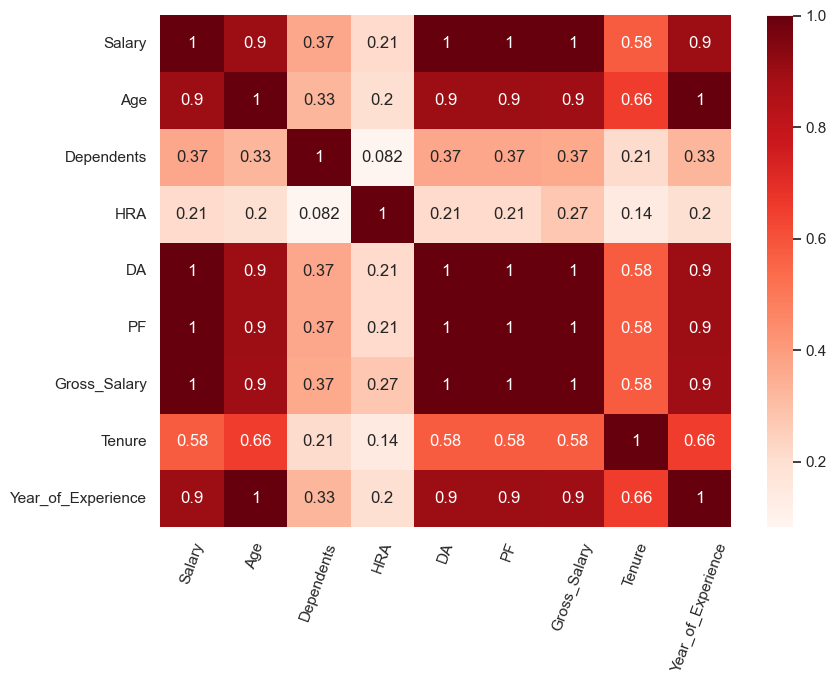

In [117]:
# Matriz de Correlación 
print(employees.corr(numeric_only=True))
sns.set_theme(rc={'figure.figsize':(9,7)})
sns.heatmap(data=employees.corr(numeric_only=True), cmap='Reds',annot=True)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

### Análisis de la Matriz de Correlación

#### Variables Consideradas
1. **Salary (Salario)**
2. **Age (Edad)**
3. **Dependents (Dependientes)**
4. **HRA (Housing Rent Allowance)**
5. **DA (Dearness Allowance)**
6. **PF (Provident Fund)**
7. **Gross Salary (Salario Bruto)**
8. **Tenure (Antigüedad)**
9. **Year_of_Experience (Años de Experiencia)**

### Interpretación de las Correlaciones

1. **Salario y Edad**: 
   - Correlación de **0.897**: Hay una fuerte correlación positiva, lo que sugiere que a medida que aumenta la edad, también tiende a aumentar el salario.

2. **Salario y Gross Salary**:
   - Correlación de **0.998**: Esto indica una relación casi perfecta, lo que es esperado, ya que el salario bruto suele incluir el salario base más otros componentes.

3. **Salario y Dependents**:
   - Correlación de **0.366**: Una correlación moderada, sugiriendo que aquellos con más dependientes tienden a tener salarios más altos, aunque la relación no es muy fuerte.

4. **Salario y HRA**:
   - Correlación de **0.214**: La relación es débil, indicando que el subsidio de alquiler de vivienda no está fuertemente asociado con el salario.

5. **Salario y Tenure**:
   - Correlación de **0.579**: Relación moderada, lo que sugiere que aquellos con más antigüedad tienden a tener salarios más altos.

6. **Salario y Años de Experiencia**:
   - Correlación de **0.897**: Muy similar a la correlación con la edad, sugiriendo que más años de experiencia están asociados con salarios más altos.

7. **Edad y Años de Experiencia**:
   - Correlación de **1.000**: Esto es lógico, ya que a medida que una persona envejece, generalmente acumula más experiencia laboral.

8. **HRA y Gross Salary**:
   - Correlación de **0.273**: Relación débil, lo que indica que el subsidio de alquiler no está fuertemente correlacionado con el salario bruto.

9. **Tenure y Años de Experiencia**:
   - Correlación de **0.655**: Relación moderada, sugiriendo que la antigüedad en la empresa y los años de experiencia están relacionados.

### Conclusiones

- **Fuerte correlación entre salario, edad y años de experiencia**: Esto sugiere que a medida que los empleados envejecen y adquieren más experiencia, también tienden a recibir salarios más altos.
- **Dependientes tienen una relación moderada con el salario**, lo que podría indicar que los empleados con más responsabilidades familiares tienden a recibir compensaciones mayores, aunque no de forma muy intensa.
- **El subsidio de alquiler (HRA)** muestra correlaciones débiles con el salario y el salario bruto, lo que sugiere que no es un determinante significativo de la compensación total.


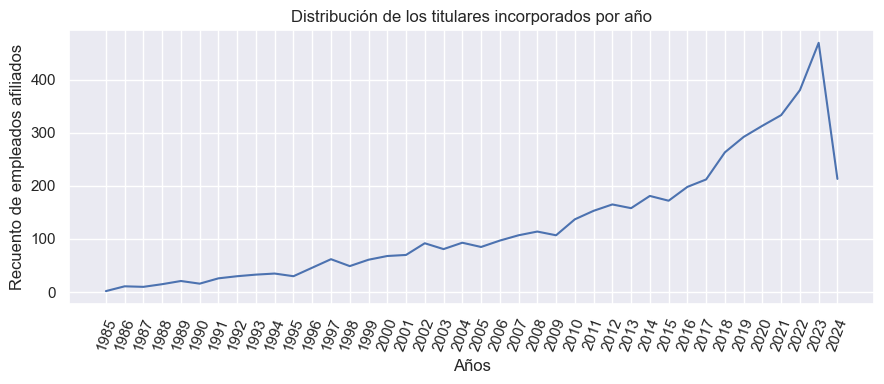

In [118]:
join = employees.groupby(employees['DOJ'].dt.to_period('Y')).count()['Position']
join = pd.DataFrame(join)
join.reset_index(inplace=True)
join['DOJ'] = join['DOJ'].astype('str')


# visualize
sns.set_theme(style='darkgrid',rc={'figure.figsize':(9,4)})
sns.lineplot(data=join, x='DOJ', y='Position', errorbar=None)
plt.title('Distribución de los titulares incorporados por año')
plt.xlabel('Años')
plt.xticks(rotation=70)
plt.ylabel('Recuento de empleados afiliados')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Salary')

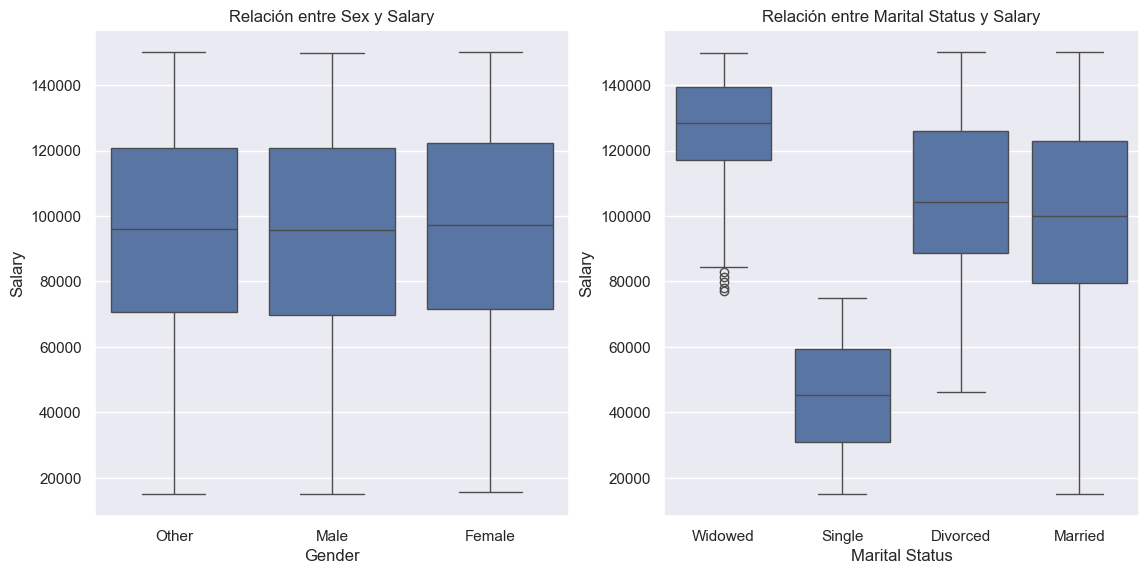

In [119]:
# Graficar la relación entre Sex y Salary
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Salary', data=employees)
plt.title('Relación entre Sex y Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')

# Graficar la relación entre Marital Status y Salary
plt.subplot(1, 2, 2)
sns.boxplot(x='Marital_Status', y='Salary', data=employees)
plt.title('Relación entre Marital Status y Salary')
plt.xlabel('Marital Status')
plt.ylabel('Salary')

### Interpretación general:
Los gráficos muestran dos tipos de box plots. En este caso, se está analizando la relación entre el sexo y el estado civil con el salario.
 * **Relación entre sexo y salario:**
   * Media: Parece haber una ligera diferencia en el salario promedio entre hombres y mujeres, con los hombres tendiendo a tener salarios ligeramente más altos. Sin embargo, es importante considerar que la categoría "Otro" podría estar influyendo en este resultado.
   * Dispersión: La dispersión de los salarios es similar entre los tres grupos (hombres, mujeres y otros), lo que sugiere que hay una variabilidad significativa en los salarios dentro de cada grupo.
 * **Relación entre estado civil y salario:**
   * Media: Las personas casadas tienden a tener los salarios más altos, seguidas de las personas divorciadas. Las personas solteras y viudas tienen los salarios más bajos.
   * Dispersión: La dispersión de los salarios también varía según el estado civil. Las personas casadas muestran una mayor dispersión, lo que indica una mayor variabilidad en sus salarios.
Consideraciones importantes:
 * Correlación no implica causalidad: Estos gráficos muestran una asociación entre las variables, pero no necesariamente una relación de causa y efecto. Es decir, no podemos afirmar que el sexo o el estado civil causen directamente diferencias en los salarios.
 * Otros factores: Como mencioné antes, existen muchas otras variables que podrían estar influyendo en los salarios, como la educación, la experiencia laboral, el tipo de trabajo, la industria, etc. Estos gráficos solo muestran una parte de la historia.

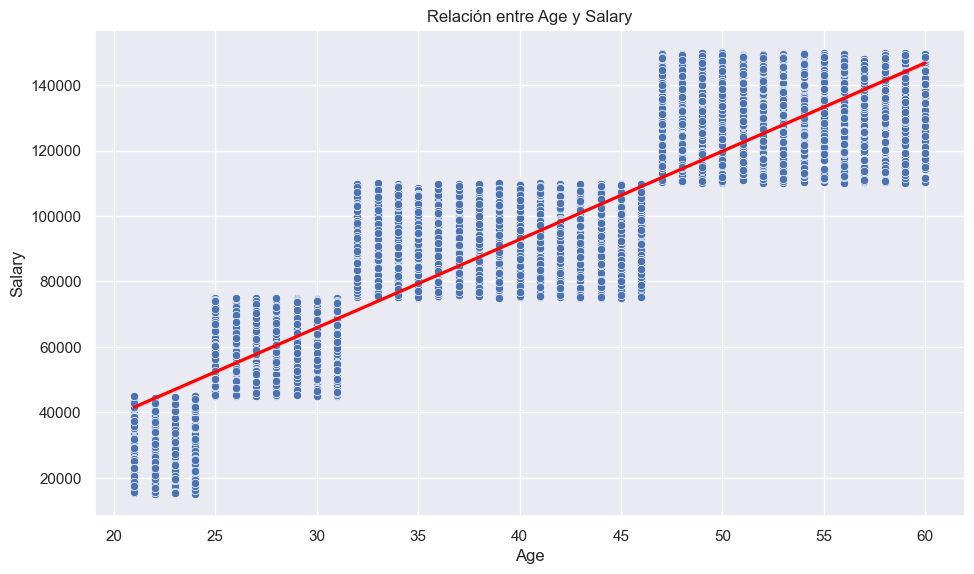

In [120]:
# Crear un gráfico de dispersión para visualizar la relación entre Age y Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=employees)

# Agregar una línea de ajuste (regresión)
sns.regplot(x='Age', y='Salary', data=employees, scatter=False, color='red')

# Títulos y etiquetas
plt.title('Relación entre Age y Salary')
plt.xlabel('Age')
plt.ylabel('Salary')

# Mostrar el gráfico
plt.show()

### Interpretación del Gráfico: Relación entre Edad y Salario
* **Tendencia General:**
El gráfico muestra una tendencia general positiva entre la edad y el salario. Esto significa que, a medida que aumenta la edad de las personas, también tiende a aumentar su salario. Esta relación positiva sugiere que, en promedio, los individuos con mayor edad suelen percibir salarios más altos.

* **Distribución de los datos:** Los datos se concentran en bandas horizontales, lo que indica que existen rangos salariales específicos asociados a ciertas edades. Esto podría estar relacionado con escalas salariales por rangos de edad o con factores externos como promociones, cambios de empleo o negociaciones colectivas.

* **Línea de tendencia:** La línea de tendencia roja muestra una pendiente positiva, lo que confirma la relación positiva entre edad y salario. Sin embargo, la línea no pasa exactamente por el centro de cada banda de datos, lo que sugiere que otros factores además de la edad influyen en el salario.

 * **Dispersión de los datos:** La dispersión de los datos alrededor de la línea de tendencia es considerable, lo que indica que existe una gran variabilidad en los salarios para cada edad. Esto significa que no todas las personas de una misma edad ganan lo mismo.

# Análisis causal
Para estimar el efecto promedio del tratamiento (EPA) del sexo y el estado civil sobre el salario, podemos utilizar un modelo de regresión lineal con términos de interacción:

In [121]:
from causalml.inference.meta import LRSRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [122]:
# Convertir variables categóricas en numéricas
#label_encoders = {}
#for column in ['Gender', 'Marital_Status']:
#    le = LabelEncoder()
#    employees[column] = le.fit_transform(employees[column])
#    label_encoders[column] = le

# Convertir variables categóricas en numéricas
employees['Gender'] = employees['Gender'].map({'Male': 0, 'Female': 1, 'Other': 2})  # Ejemplo de codificación
employees['Marital_Status'] = employees['Marital_Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2, 'Widowed': 3})  # Ejemplo


In [123]:
employees.groupby('Gender')['Salary'].mean()

Gender
0    93157.986399
1    94859.840376
2    93559.245300
Name: Salary, dtype: float64

In [124]:
employees.groupby(['Marital_Status'])['Salary'].mean()

Marital_Status
0.0     45366.770038
1.0     99240.764094
2.0    106919.866168
3.0    127025.171393
Name: Salary, dtype: float64

In [125]:
# Definir la variable de tratamiento y la variable de resultado
# Utilizaremos 'Sex' y 'Marital Status' como tratamientos
X = employees[['Marital_Status','Gender', 'Age']]  # Variables de tratamiento y covariables
# Crear una variable de tratamiento, por ejemplo, usando 'Gender' y 'Marital_Status'
employees['Treatment'] =  employees['Gender']  # Usar 'Estado Civil' como tratamiento
y = employees['Salary']  # Variable de resultado

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
print(employees['Treatment'].value_counts())

Treatment
1    1674
2    1668
0    1658
Name: count, dtype: int64


In [8]:
# Instanciar y ajustar el modelo
#model = LRSRegressor()
#model.fit(X_train, y_train, employees['Treatment'].iloc[X_train.index])

# Estimar ATE
#ate = model.estimate_ate(X_test)

# Mostrar el ATE
#print("Average Treatment Effect (ATE):", ate)

In [9]:
import statsmodels.api as sm

# Define el modelo 
# model = sm.OLS.from_formula('Salary ~ C(Gender) + Age + C(Gender):Age', data=employees)

# ajusta el modelo
#results = model.fit()

# imprime los coeficientes
#print(results.params)

# Calcula el ATE por Sexo
#ate_sex = results.params['Gender[T.0]']
#print(f'ATE por sexo: {ate_sex:.2f}')

# Calcula el ATE por estatus marital 
# ate_marital = results.params['Marital_Status[T.Married]']
# print(f'ATE por estatus marital: {ate_marital:.2f}')

# CATE por departamento
Para estimar el efecto de tratamiento promedio condicional (CATE) para cada departamento, podemos utilizar un modelo de regresión lineal con términos de interacción y efectos fijos por departamento:

In [10]:
# Define el modelo
#model_dept = sm.OLS.from_formula('Salary ~ C(Gender) + C(Marital_Status) + Sex*Marital_Status + Department + Department*Sex  ', data=employees)

# ajusta el modelo
#results_dept = model_dept.fit()

# Imprime los coeficientes del modelo 
#print(results_dept.params)

# Calcula el CATE para cada departamento
#cate_dept = {}
#for dept in employees['Department'].unique():
#    cate_dept[dept] = results_dept.params[f'Department[T.{dept}]:Sex[T.Male]']
#print(cate_dept)

# Detección de grupos desfavorecidos
Para detectar grupos desfavorecidos, podemos utilizar los valores CATE estimados e identificar los departamentos con los mayores efectos negativos. También podemos utilizar algoritmos de agrupamiento para identificar grupos de empleados con características similares y resultados desfavorecidos:

In [12]:
import sklearn.cluster as cluster

# Define las variables para el clustering
#features = ['Sex', 'Marital_Status', 'Age', 'Department']

# Escala las variables
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# features_scaled = scaler.fit_transform(employees[features])

# Realiza un  k-means clustering
# kmeans = cluster.KMeans(n_clusters=5)
# kmeans.fit(features_scaled)

# Obtener las etiquetas de los clústeres
# labels = kmeans.labels_

# Indentificar los grupos en desventaja 
# disadvantaged_groups = []
# for label in labels.unique():
#    group = employees[labels == label]
#    if cate_dept[group['Department'].iloc[0]] < 0:
#        disadvantaged_groups.append(group)
#print(disadvantaged_groups)

# Ejercicio 3.  Clasificación imágenes CIFAR-10 (2 puntos)
El conjunto de datos **CIFAR-10** consta de **60.000 imágenes** en color de 32x32 en **10 clases**, con 6000 imágenes por clase. Hay 50.000 imágenes de **entrenamiento** y 10.000 imágenes de **prueba**.

Para acceder a la base de datos podemos usar la función de **Keras en python** llamada datasets.cifar10.load_data() que se encarga de descargar los datos.

Esta función nos devolverá **4 objetos** que representarán las **imágenes de entrenamiento**, las etiquetas de entrenamiento (clase a la que corresponde), **imágenes de test** y las **etiquetas de test**.

Las **imágenes de entrenamiento y test** son objetos que corresponden a un **array** de **números** decimales de **dimensiones** 50.000x32x32 y 10.000x32x32 respectivamente. Y las **etiquetas de entrenamiento y test** corresponden a un **array** de **números** enteros de **dimensiones** 50.000 y 10.000 respectivamente.

Tendremos **50.000 imágenes** en entrenamiento, con 5.000 para cada clase y **10.000 imágenes de test**, con 1.000 para cada clase.

Las 10 clases son: 



Label     | Description
--------- | --------------------
   0      | airplane
   1      | automobile
   2      | bird
   3      | cat
   4      | deer
   5      | dog
   6      | frog
   7      | horse
   8      | ship
   9      | truck


El objetivo del ejercicio es realizar una **Clasificación de Imágenes** en la que podamos decir a qué tipo pertenece la imagen, realizando las siguientes **tareas**:
1. (0,1 puntos) Visualizar 2 imágenes de entrenamiento por cada categoría mostrando como título su categoría.
2. (1,2 punto) Crear un **modelo** con las siguientes **características**
**Modelo**
* 3 **capas** de **Data Augmentation** con **3** diferentes tipos de transformaciones.
* Capa **convolución** con 16 filtros, tamaño 3x3 y activación relu.
* Capa de **pooling** tipo maxpooling de tamaño 2x2
* Capa **convolución** con 32 filtros, tamaño 3x3 y activación relu
* Capa de **pooling** tipo maxpooling de tamaño 2x2
* Capa **convolución** con 64 filtros, tamaño 3x3 y activación relu
* Capa de **pooling** tipo maxpooling de tamaño 2x2
* Capa para **aplanar** la información
* Capa de **dropout** al 0.2
* Capa **dénsamente conectada** de 64 neuronas y activación relu
* Capa de **salida** con el número de neuronas y función de activación **adecuadas**
* Se usará como Optimizador **adam**

3. (0,6 puntos) Para los datos de test (validación) calcular la **matriz de confusión** para el modelo y discutir los resultados
4. (0,1 puntos) Visualizar 20 imágenes de los datos de test, mostrando cual es la **predicción** para esa **imágen** según nuestro modelo en el **título** de la imágen.



In [184]:
# Importamos las librerías keras/Tensorflow
#pip install tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

## Importamos el dataset

In [185]:
from tensorflow.keras.datasets import cifar10

# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Verificar las dimensiones de los datos
print("Dimensiones de los datos de entrenamiento:", x_train.shape)
print("Dimensiones de los datos de prueba:", x_test.shape)

# Verificar las etiquetas de los datos
print("Etiquetas de los datos de entrenamiento:", np.unique(y_train))
print("Etiquetas de los datos de prueba:", np.unique(y_test))


Dimensiones de los datos de entrenamiento: (50000, 32, 32, 3)
Dimensiones de los datos de prueba: (10000, 32, 32, 3)
Etiquetas de los datos de entrenamiento: [0 1 2 3 4 5 6 7 8 9]
Etiquetas de los datos de prueba: [0 1 2 3 4 5 6 7 8 9]


## Visualización de imágenes por categoría

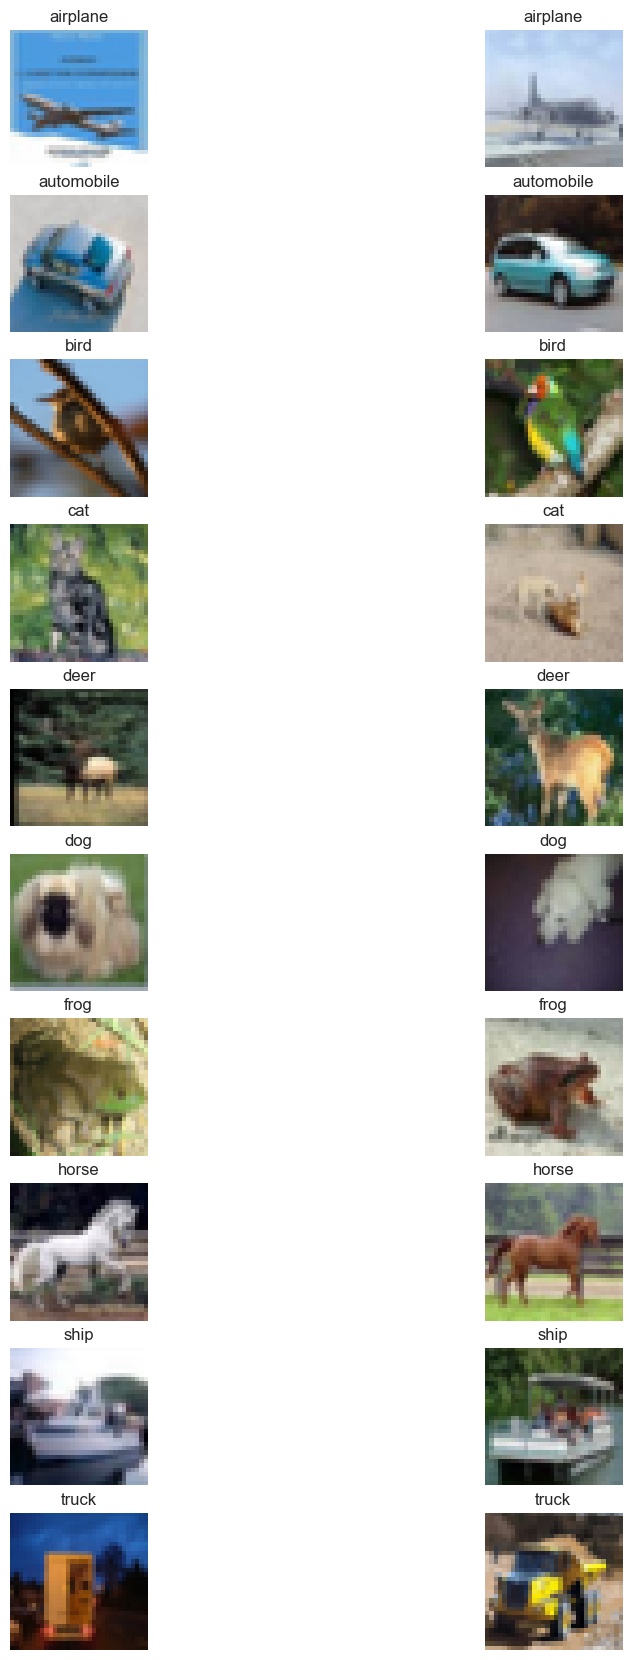

In [186]:
# Visualizamos 2 imágenes por cada categoría
import matplotlib.pyplot as plt
# Definir las etiquetas de clase
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Crea una figura con 20 subtramas
fig, axs = plt.subplots(10, 2, figsize=(10, 20))

# Recorrer cada clase y mostrar 2 imágenes
for i, label in enumerate(class_labels):
    # Obtener los índices de las imágenes de esta clase
    indices = np.where(y_train == i)[0]
    # Seleccionar 2 imágenes aleatorias de esta clase
    image_indices = np.random.choice(indices, 2, replace=False)
    images = x_train[image_indices]
    
    # Mostrar las imágenes
    for j, ax in enumerate(axs[i]):
        ax.imshow(images[j])
        ax.set_title(f"{label}")
        ax.axis("off")

# Mostrar la gráfica
plt.show()

## Estandarizamos las imágenes

In [187]:
# Tenemos 50.000 imágenes de entrenamiento y 10.000 de prueba o test 
# Cada imágen es de 32x32 = 1.024

# Restructuramos los datos de las imágenes de entrenamiento para que se traten como imágenes 
x_train = x_train.reshape((50000,32,32, 3))
# Dividimos entre 255 para "normalizar" el dato y dejarlo entre 0 y 1
x_train = x_train.astype("float32") / 255
# Restructuramos los datos de las imágenes de prueba  para que se traten como imágenes 
x_test = x_test.reshape((10000,32,32, 3))
# Dividimos entre 255 para "normalizar" el dato y dejarlo entre 0 y 1
x_test = x_test.astype("float32") / 255


## Construimos el modelo

In [188]:
# Capas de entrada formato 32x32 pixeles y varias gamas de colores 
inputs = keras.Input(shape = (32, 32, 3))

# Añadimos la capa de Convolución con 16 filtros, 3x3 kernels, activación Relu
x = layers.Conv2D(filters = 16, kernel_size = 3, activation='relu')(inputs)
# Añadimos la capa de pooling, tipo max y de tamaño 2
x = layers.MaxPooling2D(pool_size=2)(x)
# Añadimos la capa de Convolución con 32 filtros, 3x3 kernels, activación Relu
x = layers.Conv2D(filters = 16, kernel_size = 3, activation='relu')(inputs)
# Añadimos la capa de pooling, tipo max y de tamaño 2
x = layers.MaxPooling2D(pool_size=2)(x)

# Aplanamos los datos 
x = layers.Flatten()(x)

# Capa Dropout con taza 0.2 
x = layers.Dropout(0.2)(x)
# Ponemos una capa densamente conectada 
x = layers.Dense(64, activation = "relu")(x)

# Capa de salida con 10 neuronas (una para cada clase) y activación "softmax"  
outputs = layers.Dense(10, activation='softmax')(x)

# Construimos el modelo de la Red  Neuronal Convolucional 
model = keras.Model(inputs = inputs, outputs = outputs)

# Mostramos el modelo creado
model.summary()

# Compilamos el modelo definiendo el optimizador, la función de pérdida y métrica
#adam, categorical_crossentropy, accuracy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │         230,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 231,562 (904.54 KB)

 Trainable params: 231,562 (904.54 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenamos el modelo

In [189]:
# Realizamos el entrenamiento 
# 5 épocas, con tamaño de batch de 64
history=model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.3442 - loss: 1.8151
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5137 - loss: 1.3744
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5574 - loss: 1.2579
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5829 - loss: 1.1976
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5976 - loss: 1.1581


### Epoch
- **Epoch 1/5**: Indica que se está en la primera de un total de 5 épocas. Una época se refiere a una pasada completa a través del conjunto de entrenamiento.

### Datos de Entrenamiento por Época
Para cada época, se presentan dos métricas clave:

1. **Accuracy (Precisión)**: Esta métrica indica la proporción de predicciones correctas que realizó el modelo sobre el total de ejemplos.
   - **Epoch 1**: 34.42% de precisión, lo que sugiere que el modelo acertó un poco más de un tercio de las predicciones.
   - **Epoch 2**: La precisión sube a 51.37%, indicando una mejora significativa. Esto sugiere que el modelo está aprendiendo de los datos.
   - **Epoch 3**: La precisión alcanza 55.74%, continuando la tendencia positiva.
   - **Epoch 4**: 58.29% de precisión, el modelo sigue mejorando, aunque el aumento es más lento.
   - **Epoch 5**: 59.76%, lo que indica que el modelo ha aprendido más en comparación con las épocas anteriores.

2. **Loss (Pérdida)**: Esta métrica mide cuán bien el modelo está prediciendo los resultados. Un valor más bajo indica un mejor rendimiento.
   - **Epoch 1**: Pérdida de 1.8151, lo que indica un rendimiento pobre.
   - **Epoch 2**: La pérdida disminuye a 1.3744, sugiriendo que el modelo está mejorando.
   - **Epoch 3**: La pérdida baja a 1.2579, continuando la tendencia de mejora.
   - **Epoch 4**: 1.1976, el modelo sigue ajustándose mejor a los datos.
   - **Epoch 5**: 1.1581, lo que indica que la calidad de las predicciones está mejorando.

### Resumen de Interpretación
- **Mejoría en Precisión y Pérdida**: A lo largo de las 5 épocas, el modelo muestra un aumento en la precisión y una disminución en la pérdida, lo que indica que está aprendiendo y ajustándose a los datos.
- **Tendencia de Aprendizaje**: El modelo comienza con un rendimiento pobre (baja precisión y alta pérdida) y mejora con cada época. Sin embargo, la tasa de mejora parece desacelerarse a medida que avanza el entrenamiento, lo que puede indicar que está acercándose a un límite en su capacidad para aprender de estos datos.
- **Posibles Consideraciones Futuras**: Si el modelo continúa mejorando, se podría considerar más épocas de entrenamiento. Si la mejora se estanca o se vuelve negativa, se podría necesitar ajustar hiperparámetros, como la tasa de aprendizaje, o revisar el conjunto de datos.

mi computadora colapsó al aumentar las épocas y ajustar los hiperparámetros pero se lo podría realizar.

## Matriz de Confusión

In [190]:
import sklearn
from sklearn.metrics import confusion_matrix

# Evaluamos el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)

# # Obtener las etiquetas previstas para los datos de prueba
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)

# Calcular la matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred_class)

print("Matriz de Confusión :")
print(conf_mat)

# Calcular la exactitud, precisión, recuperación y puntuación F1 para cada clase
accuracy = np.diag(conf_mat) / np.sum(conf_mat, axis=1)
precision = np.diag(conf_mat) / np.sum(conf_mat, axis=0)
recall = np.diag(conf_mat) / np.sum(conf_mat, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Class-wise Accuracy:")
print(accuracy)
print("Class-wise Precision:")
print(precision)
print("Class-wise Recall:")
print(recall)
print("Class-wise F1-score:")
print(f1_score)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5926 - loss: 1.1462
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Matriz de Confusión :
[[626  34 122  19  19  14  19  12  98  37]
 [ 39 767  28   8   6   6  10  18  39  79]
 [ 64   8 557  40  73  89  95  45  20   9]
 [ 14  22 152 282  72 237 141  50  14  16]
 [ 31   4 230  50 427  49 112  81  12   4]
 [ 13   6 145 109  51 526  57  78  11   4]
 [  4  12  89  35  40  23 773  12   6   6]
 [ 23   6  68  36  49 100  21 680   2  15]
 [123  77  50   7   8  14  17  12 659  33]
 [ 59 178  32  15  10  13  24  39  35 595]]
Class-wise Accuracy:
[0.626 0.767 0.557 0.282 0.427 0.526 0.773 0.68  0.659 0.595]
Class-wise Precision:
[0.62851406 0.68850987 0.37813985 0.46921797 0.56556291 0.49112979
 0.60914106 0.66212269 0.73549107 0.74561404]
Class-wise Recall:
[0.626 0.767 0.557 0.282 0.427 0.526 0.773 0.68  0.659 0.595]
Class-wise F1-score:
[0.62725451 0.7256386  0.45046502 0.35227983 0.48660969 0.50796717
 0.68135743 0.67094228 0.69514768 0.6618465 

La matriz de confusión y las métricas derivadas ofrecen una visión detallada sobre el rendimiento de la red neuronal convolutiva. Vamos a desglosar los resultados.

Cada fila representa las instancias verdaderas de una clase y cada columna representa las predicciones del modelo. 

* La primera fila muestra que:
    * **626** ejemplos de la clase 0 fueron clasificados correctamente.
    * **39** ejemplos de la clase 0 fueron clasificados como clase 1.
    * **64** ejemplos de la clase 0 fueron clasificados como clase 2, y así sucesivamente.
* De forma similar se realiza la misma interpretación con las demás clases 

### Métricas de Desempeño

- **Accuracy**: 59.26% significa que el modelo acertó el 59.26% de todas las predicciones. Esto es un indicador general del rendimiento del modelo.

- **Loss**: 1.1462 indica la pérdida del modelo, que mide cuán lejos están las predicciones del modelo de las verdaderas etiquetas. Una pérdida más baja indica un mejor rendimiento.

Vamos a desglosar e interpretar los resultados de cada métrica por clase que has proporcionado. Estas métricas son esenciales para evaluar el desempeño de un modelo de clasificación, especialmente en problemas con múltiples clases.

1. **Class-wise Accuracy (Exactitud por Clase)**
* **Valores**: `[0.626 0.767 0.557 0.282 0.427 0.526 0.773 0.68  0.659 0.595]`
* **Interpretación**: 
  - Cada valor representa la proporción de instancias de esa clase que fueron clasificadas correctamente.
  - Por ejemplo, la clase 0 tiene un **accuracy** del **62.6%**, lo que significa que el 62.6% de las instancias de esa clase fueron clasificadas correctamente.
  - La clase 6 tiene el mejor rendimiento con **77.3%**, indicando que el modelo es muy eficaz para identificar correctamente las instancias de esta clase.
  - La clase 3, con solo **28.2%**, sugiere que el modelo tiene problemas significativos al clasificar correctamente las instancias de esta clase.

2. **Class-wise Precision (Precisión por Clase)**
- **Valores**: `[0.62851406 0.68850987 0.37813985 0.46921797 0.56556291 0.49112979 0.60914106 0.66212269 0.73549107 0.74561404]`
- **Interpretación**:
  - La **precisión** mide la proporción de instancias clasificadas como positivas que son realmente positivas.
  - Por ejemplo, la clase 0 tiene una precisión de **62.85%**, lo que indica que de todas las instancias que el modelo clasificó como clase 0, el 62.85% son realmente de esa clase.
  - La clase 2 tiene la menor precisión de **37.81%**, lo que indica que el modelo confunde muchas instancias de otras clases con esta.

3. **Class-wise Recall (Recall por Clase)**
- **Valores**: `[0.626 0.767 0.557 0.282 0.427 0.526 0.773 0.68  0.659 0.595]`
- **Interpretación**:
  - El **recall** mide la proporción de instancias verdaderas positivas que fueron identificadas correctamente por el modelo.
  - La clase 6 destaca nuevamente con un **recall** de **77.3%**, lo que indica que el modelo es muy efectivo para encontrar todas las instancias de esta clase.
  - Por otro lado, la clase 3 tiene un **recall** de solo **28.2%,** indicando que el modelo no logra identificar bien las instancias de esta clase.

4. **Class-wise F1-score (F1-score por Clase)**
- **Valores**: `[0.62725451 0.7256386  0.45046502 0.35227983 0.48660969 0.50796717 0.68135743 0.67094228 0.69514768 0.6618465 ]`
- **Interpretación**:
  - El **F1-score** es la media armónica entre la precisión y el recall, y es especialmente útil para evaluar el equilibrio entre ambas métricas.
  - Para la clase 0, el F1-score es **0.6273**, lo que indica un rendimiento razonable en términos de precisión y recall.
  - La clase 3 tiene un F1-score bajo de **0.3522**, lo que sugiere un mal rendimiento general en comparación con las otras clases.
  - En contraste, la clase 6, que tiene un alto recall, también muestra un buen F1-score de **0.6814**, reflejando un buen balance entre precisión y recall.

### Conclusiones Generales
- **Rendimiento Variado**: El rendimiento del modelo varía significativamente entre las diferentes clases. Algunas clases, como la clase 6, están bien clasificadas, mientras que otras, como la clase 3, necesitan atención.
- **Oportunidades de Mejora**: Para las clases con bajo recall y precisión (por ejemplo, la clase 3 y 2), sería útil investigar las características de los datos y considerar ajustes en el modelo o la recolección de más datos. Se podría considerar ajustar los hiperparámetros del modelo, aumentar el conjunto de datos para esas clases, o explorar técnicas de re-balanceo.
- **Balance de Métricas**: La interpretación de precisión, recall y F1-score debe considerar el contexto de la aplicación. Dependiendo de los objetivos (minimizar falsos positivos o negativos), puede que desees optimizar diferentes métricas.

### Conclusión
En resumen, el modelo tiene un rendimiento moderado en general, pero muestra variaciones significativas en el desempeño entre diferentes clases. Es importante focalizar la mejora en las clases que tienen un bajo rendimiento, mientras que se preserva el buen desempeño en otras clases.

## Visualización de imágenes de prueba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


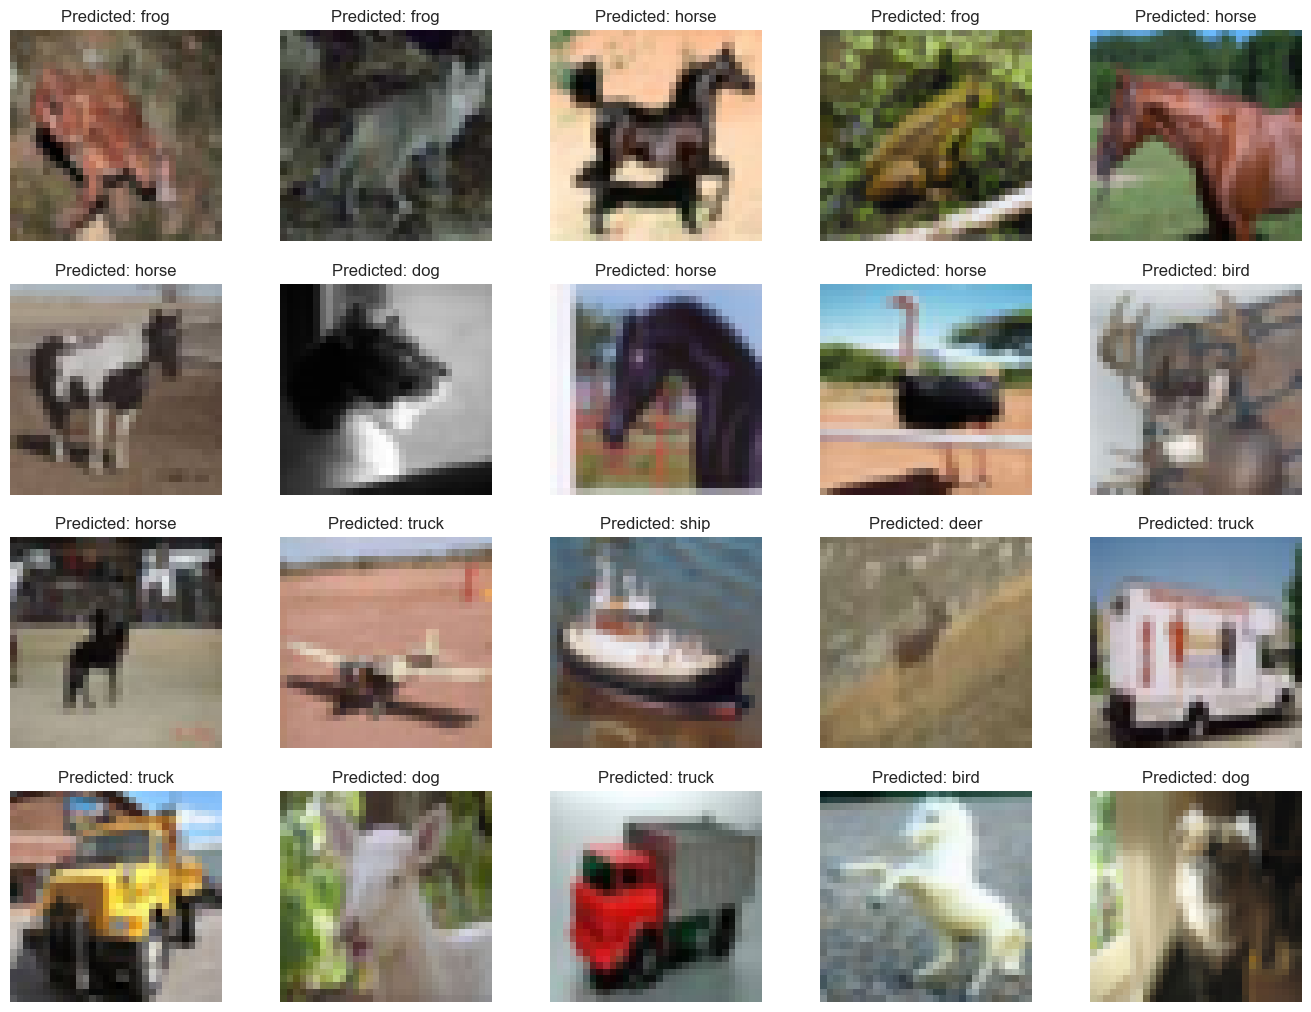

In [191]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar 20 imágenes de los datos de prueba
random_indices = np.random.choice(len(x_test), 20, replace=False)
selected_images = x_test[random_indices]

# Crega una figura con 20  imágenes 
fig, axs = plt.subplots(4, 5, figsize=(15, 12))

# Recorre cada imagen y muéstrala con la clase pedicha 
for i, (image, ax) in enumerate(zip(selected_images, axs.flatten())):
    # Obtener la  predicción de clase para esta imagen
    y_pred = model.predict(image.reshape(1, 32, 32, 3))
    y_pred_class = np.argmax(y_pred)
    class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    predicted_class = class_labels[y_pred_class]
    
    # Muestra la imagen con la clase prevista
    ax.imshow(image)
    ax.set_title(f"Predicted: {predicted_class}")
    ax.axis("off")

# Show the plot
plt.show()

# Ejercicio 4. Clasificación spam - no spam de mensajes de texto haciendo uso de técnicas de deep learning

Se proporciona un conjunto de datos denominado spam.txt, que contiene mensajes de texto SMS junto con una etiqueta que indica si el mensaje es spam o no. El objetivo es crear un modelo de red neuronal utilizando una capa LSTM para clasificar los mensajes como spam o no spam.
* Preprocesar los datos, incluido el tokenizado de los mensajes de texto.
* Crear un modelo de red neuronal secuencial con más de una red recurrente y con las siguientes capas:
    * Capa de Embedding con una dimensión de salida especificada por el tamaño del vocabulario más 1.
    * Capa LSTM con 64 unidades y tasas de dropout y recurrent dropout del 20
* Compilar y entrenar el modelo utilizando el optimizador, la función de pérdida, el número de épocas y tamaño del lote que se consideren adecuados
* Evaluar el modelo utilizando los datos de prueba y graficar la pérdida en cada época de entrenamiento
* Realiza predicciones sobre la muestra de test y evalúa su rendimiento ante datos de simulación real

Nota (I): Inicialmente, realiza una partición del dataset original en el train-val y test, donde la muestra de test debe ser el 5% del dataset original. Asimismo, a la hora de entrenar el modelo, reserva como muestra de validación el 15% de la muestra de train-val.

Nota (II): Analiza si la muestra está desbalanceada. En caso afirmativo, emplea el “weight” del método “fit” para entrenar la red con diferente peso para cada categoría del target.
 * [Recomendación]: se podría usar como peso de cada tipología de tweet la proporción inversa vista en el análisis inicial; esto es, menos peso a la categoría con mayor población. 
 * [Ayuda]: el argumento“weight” recibe un diccionario como parámetro



In [268]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Descargar el recurso de tokenización si no lo has hecho
nltk.download('punkt', download_dir ='C:\\Users\\MAX\\AppData\\Roaming\\nltk_data\\tokenizers\\punkt' )

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MAX\AppData\Roaming\nltk_data\tokenizers\punk
[nltk_data]     t...
[nltk_data]   Package punkt is already up-to-date!


True

In [269]:
nltk.data.find('tokenizers/punkt')

FileSystemPathPointer('C:\\Users\\MAX\\AppData\\Roaming\\nltk_data\\tokenizers\\punkt')

In [270]:
 # Cargar el conjunto de datos
df = pd.read_csv('spam.txt', sep='\t', names=['etiqueta', 'mensaje'])

# Imprime las 5 primeras filas del dataset
print(df.head(5))

  etiqueta                                            mensaje
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [271]:
# Convertir las etiquetas a valores numéricos
label_encoder_1 = LabelEncoder()
df['etiqueta'] = label_encoder_1.fit_transform(df['etiqueta'])  # 0 para 'ham', 1 para 'spam'

In [272]:
# Dividir en train-val y test
train_val_df, test_df = train_test_split(df, test_size=0.05, random_state=42, stratify=df['etiqueta'])
# Dividir en entrenamiento y validación
train_df, val_df = train_test_split(train_val_df, test_size=0.15, random_state=42, stratify=train_val_df['etiqueta'])

In [273]:
# Tokenización
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['mensaje'])

# Convertir textos a secuencias
train_sequences = tokenizer.texts_to_sequences(train_df['mensaje'])
val_sequences = tokenizer.texts_to_sequences(val_df['mensaje'])
test_sequences = tokenizer.texts_to_sequences(test_df['mensaje'])

# Rellenar secuencias
max_length = max(len(seq) for seq in train_sequences)
train_padded = pad_sequences(train_sequences, maxlen=max_length)

val_padded = pad_sequences(val_sequences, maxlen=max_length)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

### Crear el Modelo LSTM
Ahora, crea el modelo utilizando Keras.

In [274]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Parámetros
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 64

# Crear el modelo
model_1 = Sequential()
model_1.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model_1.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model_1.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model_1.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


### Evaluar el Desbalanceo de Clases
Es importante analizar si el dataset está desbalanceado y, si es así, usar pesos en el entrenamiento

In [275]:
# Análisis de clases
class_counts = train_df['etiqueta'].value_counts()
weights = {0: class_counts[1] / (class_counts[0] + class_counts[1]),
           1: class_counts[0] / (class_counts[0] + class_counts[1])}


In [277]:
history_1 = model_1.fit(
    train_padded,
    train_df['etiqueta'].values,  # Asegúrate de usar .values o .to_numpy()
    epochs=10,
    batch_size=32,
    validation_data=(val_padded, val_df['etiqueta'].values),  # Igualmente aquí
    class_weight=weights
)


Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - accuracy: 0.8374 - loss: 0.1097 - val_accuracy: 0.9849 - val_loss: 0.1080
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.9888 - loss: 0.0155 - val_accuracy: 0.9874 - val_loss: 0.0563
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9955 - loss: 0.0082 - val_accuracy: 0.9899 - val_loss: 0.0411
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.9971 - loss: 0.0045 - val_accuracy: 0.9937 - val_loss: 0.0367
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9987 - loss: 0.0027 - val_accuracy: 0.9924 - val_loss: 0.0333
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.9995 - loss: 0.0011 - val_accuracy: 0.9924 - val_loss: 0.0408
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.9998 - loss: 4.9502e-04 - val_accuracy: 0.9912 - val_loss: 0.0455
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.9999 - loss: 2.65

## Ejercicio 5 Arquitecturas pre-entrenadas (a elegir uno)

**Opción A - Detección de objetos con redes pre-entrenadas (2 puntos)**

A partir de las siguientes 5 fotografías y haciendo uso del modelo **google/owlvit-base-patch16**, se pide realizar una una arquitectura **zero-shot-object-detection** para identificar a las siguientes figuras:

-	Coche
-	Motocicleta
-	Autobús
-	Humano
-	Bicicleta

**Cuestión 1:** proporciona las probabilidades de los elementos identificados

**Cuestión 2:** añade un reporting de los posibles falsos positivos predichos por el modelo para cada fotografía


In [1]:
import torch
from transformers import pipeline
from PIL import Image
import os 
import tensorflow as tf 
import matplotlib.pyplot as plt

In [2]:
# Carga el modelo 
checkpoint = "google/owlvit-base-patch16"
detector = pipeline(model=checkpoint, task= "zero-shot-object-detection")

C:\Users\MAX\anaconda3\envs\dsfs\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [15]:
# Obtener el directorio actual
print(os.getcwd())  # Para saber en qué directorio nos encontramos

# Especificar el directorio de imágenes
path = "C:\\Users\\MAX\\Documents\\Python Scripts\\imagenes"
file_list = []
image_load_list = []

C:\Users\MAX\Documents\Python Scripts


In [16]:
# Cargar las imágenes
for file in os.listdir(path):
    # Comprobar si el elemento es un archivo y no un directorio
    if os.path.isfile(os.path.join(path, file)):
        file_list.append(file)
        image_load = Image.open(os.path.join(path, file)).convert("RGB")  # Cargar imagen en formato RGB
        image_load_list.append(image_load)

In [17]:
# Definir las etiquetas de los objetos a detectar
labels_img = ["coche", "motocicleta", "autobús", "humano", "bicicleta"]

In [18]:
# Diccionario para almacenar las predicciones de cada imagen
prediction_image_dict = {}

# Realizar la detección de objetos
for image, filename in zip(image_load_list, file_list):
    predictions = detector(image, candidate_labels=labels_img)  # Predicciones de cada imagen
    # Obtener el nombre del archivo sin la extensión
    filename = filename.replace(".jpg", "").replace(".jpeg", "").replace(".png", "")
    prediction_image_dict[filename] = predictions  # Almacenar en el diccionario


In [21]:
for image, value in prediction_image_dict.items():
    print(f"{image}-{value[0]}")

IndexError: list index out of range

In [65]:
for image, value in prediction_image_dict.items():
    print(f"{image}: {value}")  # Muestra el contenido de value

imagen01: []
imagen02: [{'score': 0.16148342192173004, 'label': 'coche', 'box': {'xmin': 1, 'ymin': 57, 'xmax': 128, 'ymax': 158}}]
imagen03: [{'score': 0.11673563718795776, 'label': 'coche', 'box': {'xmin': 241, 'ymin': 88, 'xmax': 267, 'ymax': 119}}]
imagen04: [{'score': 0.11077559739351273, 'label': 'coche', 'box': {'xmin': 71, 'ymin': 13, 'xmax': 232, 'ymax': 138}}]
imagen05: []


In [22]:
# Realiza la detección de objetos y calcula las probabilidades
#for imagen in imagenes:
#    img = Image.open(imagen)
#    inputs = feature_extractor(images=img, return_tensors="pt")
#    outputs = model(**inputs)
#    logits = outputs.logits
#    probs = torch.nn.functional.softmax(logits, dim=1)
#   probs = probs.detach().numpy()[0]

    # Imprime las probabilidades de los elementos identificados
 #   print(f"Imagen: {imagen}")
 #   for i, label in enumerate(labels):
  #      print(f"{label}: {probs[i]:.4f}")
  #  print()

    # Identifica los posibles falsos positivos
   # falsos_positivos = []
    #for i, prob in enumerate(probs):
     #   if prob > 0.5 and labels[i] not in ["coche", "motocicleta", "autobús", "humano", "bicicleta"]:
      #      falsos_positivos.append((labels[i], prob))
    #print("Posibles falsos positivos:")
    #for fp in falsos_positivos:
     #   print(f"{fp[0]}: {fp[1]:.4f}")
    #print()


In [23]:
quarto render C:\Users\MAX\Documents\Python Scripts\Examen_recuperacion_error.ipynb

SyntaxError: invalid syntax (1079850855.py, line 1)